# Банки — Анализ оттока клиентов.

<p></p>

<div style="border:solid black 1px; padding: 20px">Я работаю аналитиком в одном из лучших банков страны «Метанпромбанк».</div>

<p></p>

<div style="background: #E6E6FA; padding: 5px; border: 1px solid #778899; border-radius: 5px;">
    <font color='20B2AA'><b>Цель исследования.</b></font>
    <br />
    <br />
    <font color='778899'> Уменьшить отток клиентов. </font><p></p>
</div>

<div style="background: #E6E6FA; padding: 5px; border: 1px solid #778899; border-radius: 5px;">
    <font color='20B2AA'><b>Задачи.</b></font>
    <br />
    <br />
    <font color='778899'>1) Провести исследовательский анализ данных. <br />
    2) Выделить портреты клиентов, которые склонны уходить из банка. <br />
    3) Сформулируовать и проверить статистические гипотезы. <br /> 
    </font><p></p>
</div>

<div style="background: #E6E6FA; padding: 5px; border: 1px solid #778899; border-radius: 5px;">
    <font color='20B2AA'><b>Гипотезы.</b></font>
    <br />
    <br />
    <font color='778899'> 1) Доходы клиентов, которые ушли и клиентов, которые остались, различаются.<br />
    2) Количество продуктов ушедших клиентов в среднем меньше количества продуктов у оставшихся.  </font><p></p>
</div>

<div style="background: #E6E6FA; padding: 5px; border: 1px solid #778899; border-radius: 5px;">
    <font color='20B2AA'><b>Этапы исследования.</b></font>
    <br />
    <br />
    <font color='778899'> 1) Выгрузить данные. <br />
    2) Изучить данные. <br />
    3) Предобработка данных. <br />
    4) Исследовательский анализ данных: <br />
        -анализ общего распределения признаков клиентов банка<br />
        -анализ корреляций<br />
        -составление портрета отточных и остающихся клиентов<br />
        -распределение признаков в разрезе городов клиентов<br />
        -распределение признаков в разрезе количества используемых продуктов. <br />
    5) Проверка гипотез. <br />
    6) Анализ и сравнение выводов. <br />
    7) Составление рекомендаций для заказчика. <br />
    8) Создание дашборда.<br />
    9) Создание презентации.<br />
     </font><p></p>
</div>

<div style="background: #E6E6FA; padding: 5px; border: 1px solid #778899; border-radius: 5px;">
    <font color='20B2AA'><b>План презентации.</b></font>
    <br />
    <br />
    <font color='778899'> 1) Цель исследования. <br />
        2) Источник данных.<br />
        3) Главные выводы.<br />
        4) Портрет клиента, склонного к оттоку. <br />
        5) Распределение оттока по различным признакам. <br />
        6) Проверка гипотез. <br />
        7) Общие рекомендации.<br />
        </font><p></p>
</div>

<div style="background: #E6E6FA; padding: 5px; border: 1px solid #778899; border-radius: 5px;">
    <font color='20B2AA'><b>Исходные данные.</b></font>
    <br />
    <br />
<font color='778899'>
- `userid` — идентификатор пользователя, <br /> 
- `score` — баллы кредитного скоринга, <br /> 
- `City` — город, <br /> 
- `Gender` — пол, <br /> 
- `Age` — возраст, <br /> 
- `Objects` — количество объектов в собственности, <br /> 
- `Balance` — баланс на счёте, <br /> 
- `Products` — количество продуктов, которыми пользуется клиент, <br /> 
- `CreditCard` — есть ли кредитная карта, <br /> 
- `Loyalty` — активный клиент, <br /> 
- `estimated_salary` — заработная плата клиента, <br /> 
- `Churn` — ушёл или нет.
</font><p></p>
</div>

## Загрузка данных и подготовка их к анализу.

### Загрузка данных и знакомство с ними.

In [7]:
#Импортирую библиотеки.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import datetime as dt
from pandas.plotting import register_matplotlib_converters
import warnings
import plotly.express as px
from plotly import graph_objects as go
import re 
import math as mth
from scipy import stats as st

In [8]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [9]:
#Открываю файлы с данными.
#Открываю файлы с данными.
try:
    data = pd.read_csv('bank_dataset.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/bank_dataset.csv')
data.head()

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


In [10]:
#смотрю информацию о дф
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [11]:
#описание дф
data.describe()

,userid,score,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.573368e+07,650.528800,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.560844e+07,350.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.567126e+07,584.000000,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.573347e+07,652.000000,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.579597e+07,718.000000,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.585843e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Вывод**
<p></p>
<div style="border:solid green 2px; padding: 20px">
<p></p>Датафрейм имеет 12 столбцов и 10000 строк, пропуски есть только в 6 столбце. Типы данных в стобцах соответсвуют данным в них. Объема данных хватит для корректного анализа.

### Предобработка данных

#### Работа с названиями стобцов. 

In [12]:
#замена названий столбцов на удобные 
data.columns=['user_id', 'score', 'city', 'gender', 'age', 'objects', \
              'balance', 'products', 'credit_card', 'loyalty', 'salary', 'churn']
data.head(2)

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0


**Вывод**
<p></p>
<div style="border:solid green 2px; padding: 20px">
<p></p> Названия приведены к единому стилю. Все символы в нижнем регистре, слова разделены "_", "estimated_salary" заменила на "salary" для удобства. 

#### Работа с пропусками.

In [13]:
#сумма пропусков
data.isna().sum()

user_id           0
score             0
city              0
gender            0
age               0
objects           0
balance        3617
products          0
credit_card       0
loyalty           0
salary            0
churn             0
dtype: int64

In [14]:
print('Процент пропусков:\n', round(data['balance'].isna().sum() * 100 / len(data['balance']), 2))

Процент пропусков:
 36.17


In [15]:
#отдельный датасет с данными, имеющими пропуски
data_isna = data[data['balance'].isna()]
data_isna.head()

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0
11,15779909,497,Рыбинск,М,24,3,NaN,2,1,0,76390.01,0
12,15675000,476,Ярославль,Ж,34,10,NaN,2,1,0,26260.98,0


In [16]:
#описание столбцов с числовыми значениями
data_isna.describe()

,user_id,score,age,objects,balance,products,credit_card,loyalty,salary,churn
count,3.617000e+03,3617.000000,3617.000000,3617.000000,0.0,3617.000000,3617.000000,3617.000000,3617.000000,3617.000000
mean,1.573469e+07,649.452861,38.434891,5.071330,NaN,1.784628,0.716616,0.517832,98983.559549,0.138236
std,7.194749e+04,96.158798,10.492002,2.860781,NaN,0.496455,0.450704,0.499751,57730.828955,0.345195
min,1.560844e+07,350.000000,18.000000,0.000000,NaN,1.000000,0.000000,0.000000,90.070000,0.000000
25%,1.567226e+07,583.000000,31.000000,3.000000,NaN,1.000000,0.000000,0.000000,49506.820000,0.000000
50%,1.573608e+07,651.000000,37.000000,5.000000,NaN,2.000000,1.000000,1.000000,98618.790000,0.000000
75%,1.579629e+07,717.000000,43.000000,7.000000,NaN,2.000000,1.000000,1.000000,148330.970000,0.000000
max,1.585810e+07,850.000000,88.000000,10.000000,NaN,4.000000,1.000000,1.000000,199992.480000,1.000000


**На первый взгляд данные с пропусками в столбце "balance" выглядят также как и целый датафрейм. Нужно посмотреть более детально.**

In [17]:
#количество строк с пропусками с разбивкой по разным признакам
data_isna.groupby('churn')['churn'].count()

churn
0    3117
1     500
Name: churn, dtype: int64

In [18]:
data_isna.groupby('objects')['objects'].count()

objects
0     137
1     349
2     382
3     352
4     369
5     374
6     367
7     386
8     363
9     360
10    178
Name: objects, dtype: int64

In [19]:
data_isna.groupby('products')['products'].count()

products
1     905
2    2600
3      98
4      14
Name: products, dtype: int64

In [20]:
data_isna.groupby('city')['city'].count()

city
Рыбинск      1199
Ярославль    2418
Name: city, dtype: int64

**Данные о балансе отсутвуют без каких-нибудь явных особенностей: у отточных и оставшихся клиентов, с разным количеством объектов в собственности, с разным количеством продуктов. Но стоит отметить, что пропусков нет у клиентов с Ростова Великого.**

**Вывод**
<p></p>
<div style="border:solid green 2px; padding: 20px">
<p></p> 1) Пропуски только в столбце 'balance'. <br />
    2) Их давольно много - 36,17%. <br />
    3) Они не связаны ни с одним признаком, кроме города. Пропусков нет у клиентов с Ростова Великого. <br />
    <br />
    С одной стороны, пропусков много и, удалив их, мы потеряем большую часть данных. С другой стороны, колонка одна из ключевых, и хотелось бы работать только с полными данными. Заполнение их медианами/средними приведёт к смещению статистик. Да, можно поставить "заглушку", но тогда надо отдавать отчёт, что во всем последующем коде про эту "заглушку" помнить придётся. Т.е. перед построением всех графиков, гистограмм заглушку надо будет удалить. Перед расчетом корреляций - заглушку надо будет удалить. Перед проверкой гипотез заглушку надо будет удалить.<br />
<br />
В данной ситуации хорошо бы посоветоваться с коллегами или заказчиком, чтобы узнать причину пропусков. Возможно, это нули, а может эти данные и правда отсутсвуют. Интересно также, почему нет пропусков в данных среди клиентов Ростова Великого. Может быть такие данные в Ростове не сохраняют, так как город большой и полных данных достаточно. Но возможности обратиться к заказчику нет.<br />
<br />    
Я решила ничего не менять и оставить пропуски как есть. 

#### Предобработка данных.

In [21]:
#поиск явных дубликатов
data[data.duplicated()].count()

user_id        0
score          0
city           0
gender         0
age            0
objects        0
balance        0
products       0
credit_card    0
loyalty        0
salary         0
churn          0
dtype: int64

In [22]:
#поиск пользователей с одинаковым id
dup = data.duplicated(subset=['user_id'])
data[dup==True]

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,salary,churn


In [23]:
#поиск неявных дубликатов
data['city'].unique()

array(['Ярославль', 'Рыбинск', 'Ростов Великий'], dtype=object)

In [24]:
data['gender'].unique()

array(['Ж', 'М'], dtype=object)

In [25]:
#замена значений "М" на 1, "Ж" на 0:
data.loc[data['gender']=='М', 'gender'] = 1
data.loc[data['gender']=='Ж','gender'] = 0

#поменяем тип данных int:
data['gender'] = data['gender'].astype(int)

data['gender'].unique()

array([0, 1])

**Вывод**
<p></p>
<div style="border:solid green 2px; padding: 20px">
<p></p> Дубликаты не найдены. Значения пола клиентов заменены на 0/1, где "М"-1, "Ж"-0.

## Исследовательский анализ данных.

### Общее распределение признаков клиентов банка.

***Задам функции для построения графиков. чтобы использовать их вдальнейшем.***

In [26]:
#функция для графиков с непрерывными значениями
def kde(data, hue=None):
    for column in ['score',  'balance', 'salary', 'age']:
        sns.set_style('darkgrid')
        sns.displot(data=data, x=column, hue=hue, kde=True, color='#645CBB',fill=False);
        plt.title(f'Распределение клиентов по признаку {column}', fontsize=20, color='#243763')
        plt.xlabel(f'Признак- {column}', fontsize='15', color='#2F4F4F')
        plt.ylabel('Клиенты', fontsize='15', color='#2F4F4F')
        plt.xticks(fontsize='10', color='#301E67')
        plt.yticks(fontsize='10', color='#301E67')
        plt.grid(True)
        plt.show()

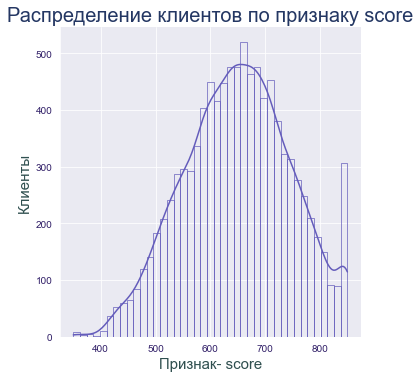

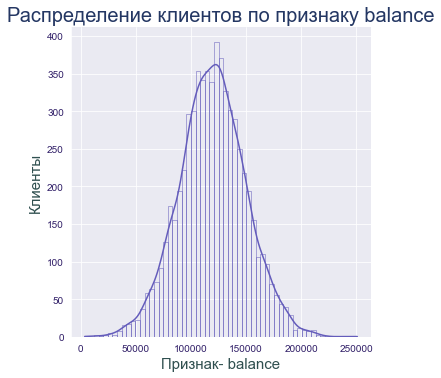

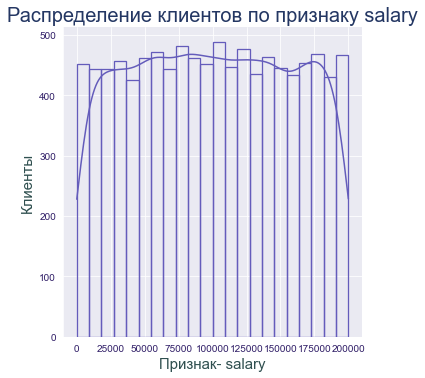

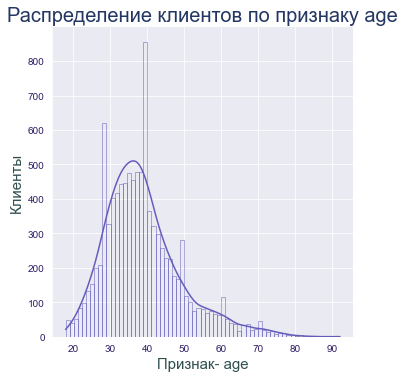

In [27]:
kde(data, hue=None);

*Все распределения выглядят нормально, кроме распределения клиентов по их зарплате. В этом графике мы видим давольно большое плато. Это ненормально. Возможно, дальше нам удастся найти причину этого плато.<p></p> Также можно отметить большой выброс на графике 'score' - непонятная группа "хороших" клиентов в рейтингом больше 830 баллов*

In [28]:
#функция для графиков с дискретными значениями
def tab(data, hue=None):
    for column in ['city','gender', 'credit_card', 'loyalty', 'objects', 'products', 'churn']:
        palette = sns.color_palette("mako_r", 11)
        ax = sns.countplot(data=data, x=column, hue=hue,palette=palette);
        plt.title(f'Распределение клиентов по признаку {column}', fontsize=20, color='#243763')
        plt.xlabel(f'Признак- {column}', fontsize='15', color='#2F4F4F')
        plt.ylabel('Клиенты', fontsize='15', color='#2F4F4F')
        plt.xticks(fontsize='10', color='#301E67')
        plt.yticks(fontsize='10', color='#301E67')
        plt.grid(True)
        plt.show();

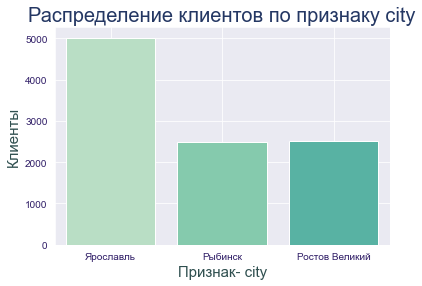

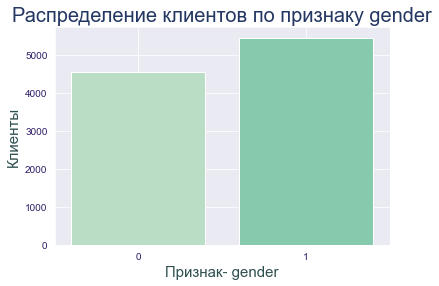

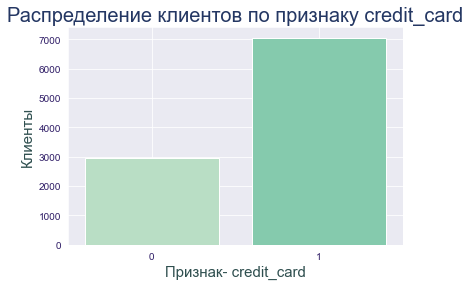

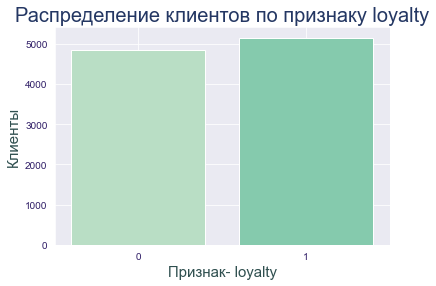

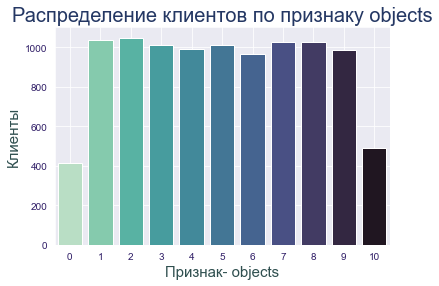

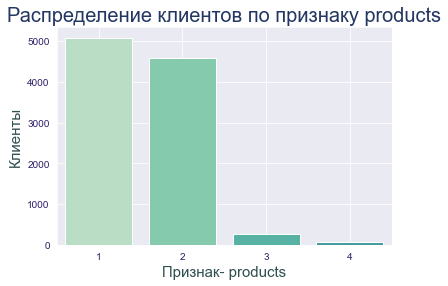

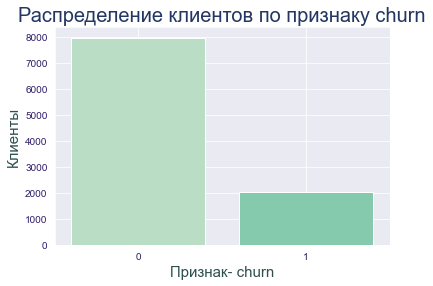

In [29]:
tab(data, hue=None);

**Вывод**
<p></p>
<div style="border:solid green 2px; padding: 20px">
<p></p> Пройдемся по каждому признаку:<br />
    1) score - распределение выглядит нормально. Среднее значение рейтинга 650. Но есть группа клиентов с максимальным рейтингом в 850, что странно.<br />
    2) gender - здесь никаких особенностей. Клиентов-мужчин чуть больше, но не намного.<br />
    3) age - распределение нормальное. Средний возраст клиентов - 38 лет. Хотя есть выбросы в районе 30 и 40 лет. Также важно отметить, что минимальное значение 18 лет, а значит, ошибок здесь нет.<br />
    4) objects - вот здесь график выглядит ненормально. Не может быть, чтобы клиенты распределялись одинаково по наличию объектов в собствености. Вряд ли клиентов с 1 объектом такое же количество, как и клиентов с 5 и 9 объектами. В этой аномалии предстоит разобраться.<br />
    5) balance - абсолютно нормальное распределение.<br />
    6) products - тут тоже все логично. График убывает от меньшего к большему.<br />
    7) credit_card - видимо у банка неплохие условия по кредитке, потму что 70% клиентов оформили их себе.<br />
    8) loyalty - активных клиентов чуть больше.<br />
    9) salary - как уже писала выше, на графике плато и это странно.<br />
    10) churn - ушедших клиентов 20%. Постараемся уменьшить эту цифру.<br />
    11) city - в Ярославле в 2 раза больше клиентов, чем в Ростове или Рыбинске.

### Анализ корреляций.

In [30]:
corrm = data.corr() #вычисляем матрицу корреляций
corrm

,user_id,score,gender,age,objects,balance,products,credit_card,loyalty,salary,churn
user_id,1.000000,0.005308,-0.002641,0.009497,-0.014883,-0.008690,0.016972,-0.014025,0.001665,0.015271,-0.006248
score,0.005308,1.000000,-0.002857,-0.003965,0.000842,-0.004744,0.012238,-0.005458,0.025651,-0.001384,-0.027094
gender,-0.002641,-0.002857,1.000000,-0.027544,0.014733,0.025742,-0.021859,0.005766,0.022544,-0.008112,-0.106512
age,0.009497,-0.003965,-0.027544,1.000000,-0.009997,-0.012822,-0.030680,-0.011721,0.085472,-0.007201,0.285323
objects,-0.014883,0.000842,0.014733,-0.009997,1.000000,0.005827,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,-0.008690,-0.004744,0.025742,-0.012822,0.005827,1.000000,-0.001027,0.006721,-0.020418,-0.001856,0.017208
products,0.016972,0.012238,-0.021859,-0.030680,0.013444,-0.001027,1.000000,0.003183,0.009612,0.014204,-0.047820
credit_card,-0.014025,-0.005458,0.005766,-0.011721,0.022583,0.006721,0.003183,1.000000,-0.011866,-0.009933,-0.007138
loyalty,0.001665,0.025651,0.022544,0.085472,-0.028362,-0.020418,0.009612,-0.011866,1.000000,-0.011421,-0.156128
salary,0.015271,-0.001384,-0.008112,-0.007201,0.007784,-0.001856,0.014204,-0.009933,-0.011421,1.000000,0.012097


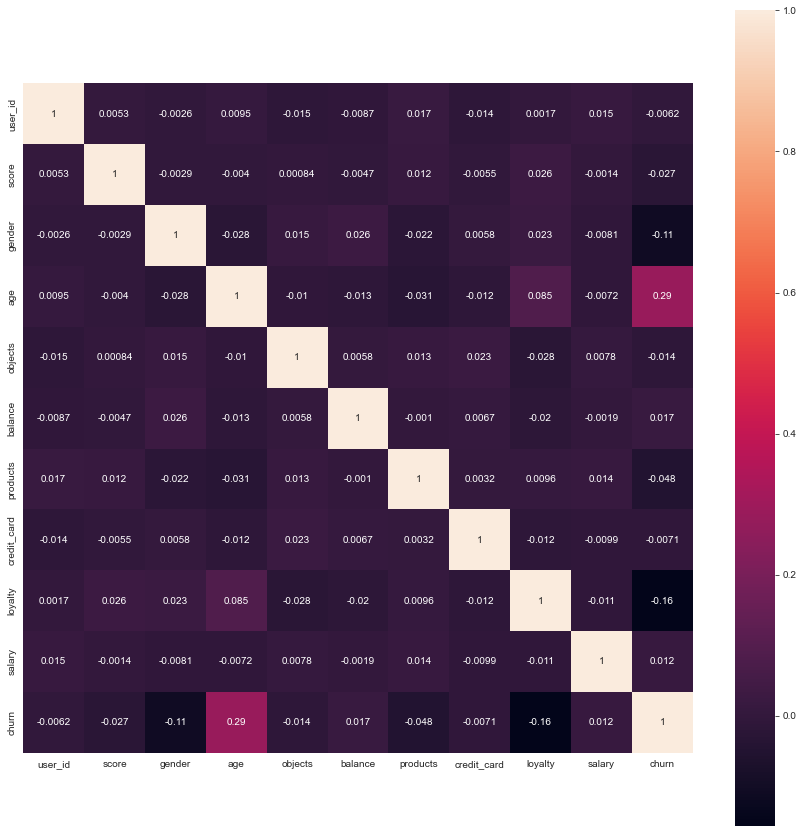

In [31]:
#график матрицы корреляций 
plt.figure(figsize=(15,15))
sns.heatmap(corrm, annot=True, square=True)

plt.show()

**Вывод**
<p></p>
<div style="border:solid green 2px; padding: 20px">
<p></p> График практически однотонный. Как видно и по таблице, и по графику, корреляция между признакими очень маленькая. Можно отметить возраст/отток, но 29% все равно мало для утверждения, что возраст влияет на отток.

### Составление портрета отточных и остающихся клиентов

In [32]:
#посмотрим средние цифры отточных и остающихся клиентов 
data.groupby(['churn'])['score', 'city', 'gender', 'age', 'objects', 'balance', \
                        'products', 'credit_card', 'loyalty', 'salary'].mean()

C:\Users\Aliya\AppData\Local\Temp\ipykernel_4592\1874394806.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby(['churn'])['score', 'city', 'gender', 'age', 'objects', 'balance', \


,score,gender,age,objects,balance,products,credit_card,loyalty,salary
churn,,,,,,,,,
0,651.853196,0.572523,37.408389,5.033279,119535.864270,1.544267,0.707146,0.554565,99738.391772
1,645.351497,0.440844,44.837997,4.932744,120746.971132,1.475209,0.699067,0.360825,101465.677531


*Различия в среднем показателе есть по признаку "loyalty". Вполне может быть, что отточные клиенты менее активные. В остальном все примерно на одном уровне. Посмотрим теперь на графиках.*

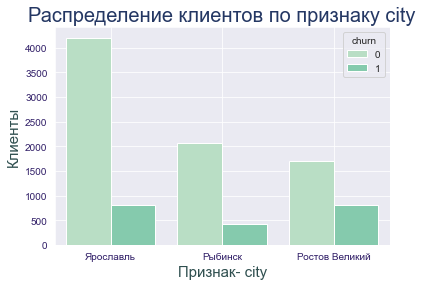

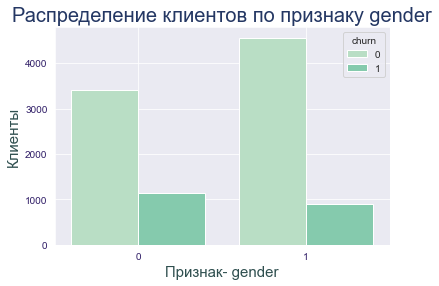

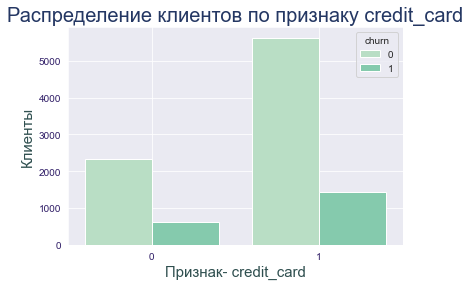

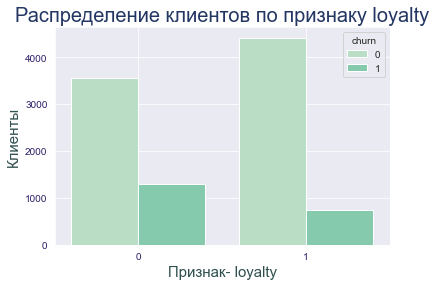

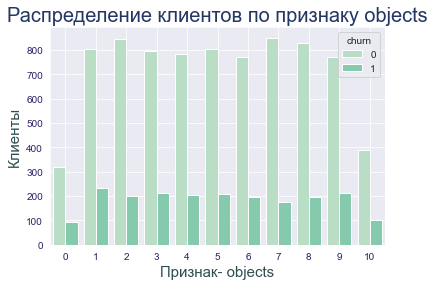

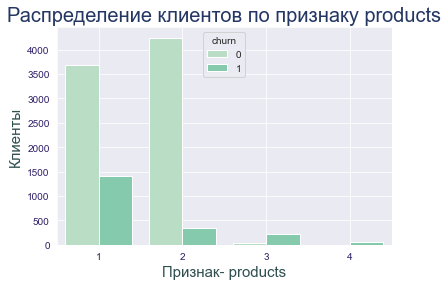

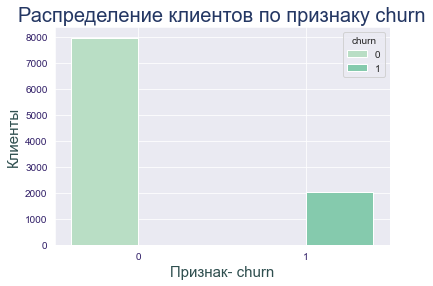

In [33]:
#вызовем предыдущие функции с параметром hue='churn'
tab(data, hue='churn') 

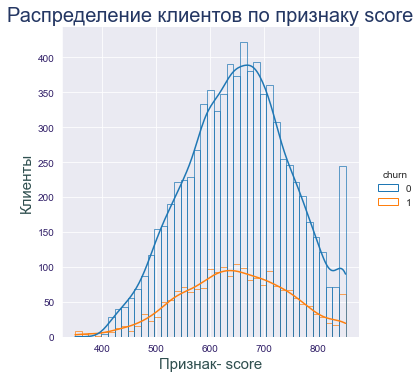

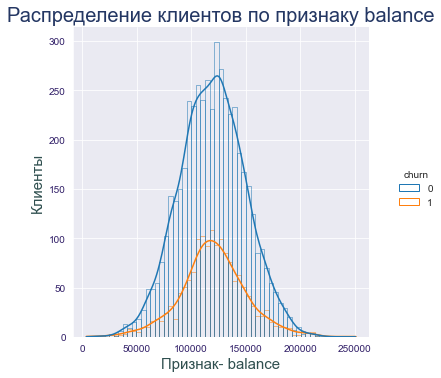

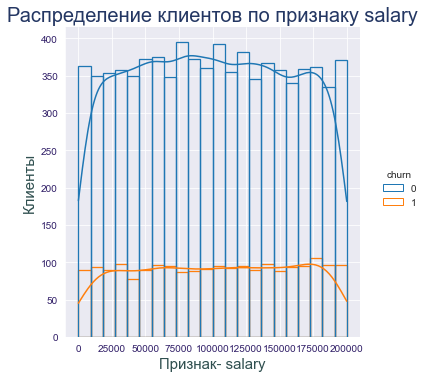

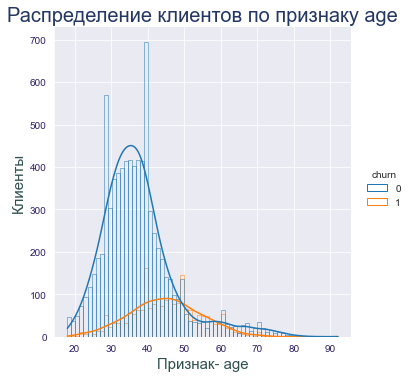

In [34]:
kde(data, hue='churn');

**Вывод**
<p></p>
<div style="border:solid green 2px; padding: 20px">
<p></p> 
    <b>Портрет отточного клиента:</b><br />
    Наш ушедший клиент, возможно, из Ростова Великого, это женщина в возрасте около 45 лет. У нее может быть или не быть кредитной карты, а также ,скорее всего, она является неактивным клиентом с 3-4 продуктами.<br /><br />
    <b>Портрет клиента, который остался с банком:</b><br />
    Это мужчина моложе оттчного клиента (около 32-39 лет), с Ярославля, активный для банка и скорее всего с двумя продуктами.<br />
    У обоих типов клиентов кредитный рейтинг, остаток на балансе и заработная плата примерно на одном уровне. <br />

### Распределение признаков в разрезе городов клиентов.

In [35]:
#посмотрим сколько клиентов в каждом из филиалов
city_group = data.groupby('city')['user_id'].count().sort_values(ascending=False).reset_index()
city_group

,city,user_id
0,Ярославль,5014
1,Ростов Великий,2509
2,Рыбинск,2477


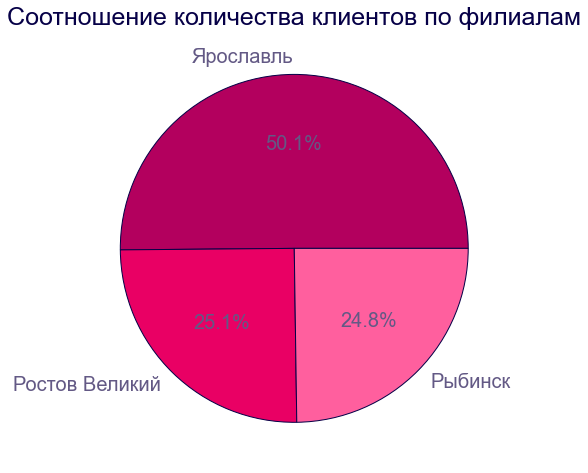

In [36]:
#график
fig, ax = plt.subplots(figsize=(13, 8))
ax.pie(city_group['user_id'], labels=city_group['city'], textprops={'fontsize':20, 'color':'#635985'}, 
       colors=['#B3005E','#E90064','#FF5F9E'], autopct='%1.1f%%', wedgeprops = { 'linewidth' : 1, 'edgecolor' : '#060047' })

plt.title('Cоотношение количества клиентов по филиалам', fontsize='25', color='#060047')

plt.show();

*В Ярославле в два раза больше клиентов, чем в Ростове или Рыбинске.*

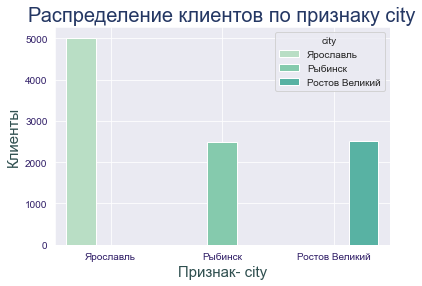

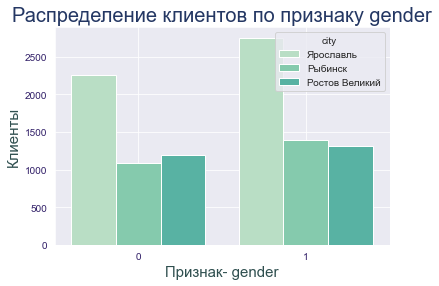

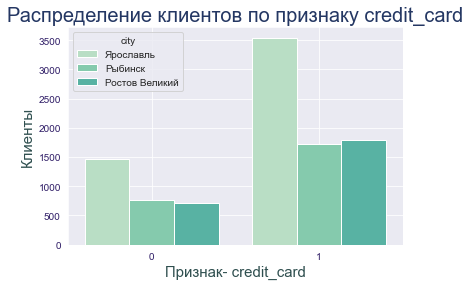

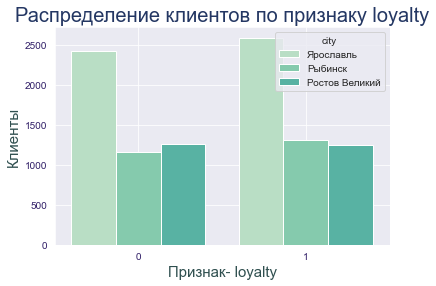

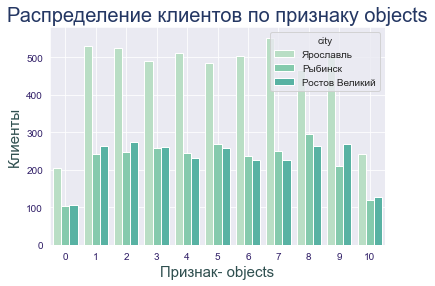

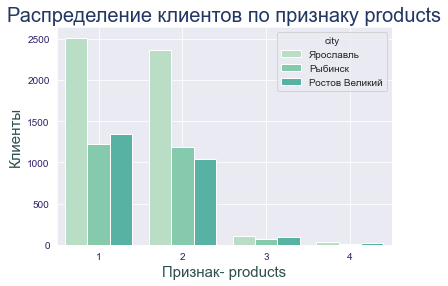

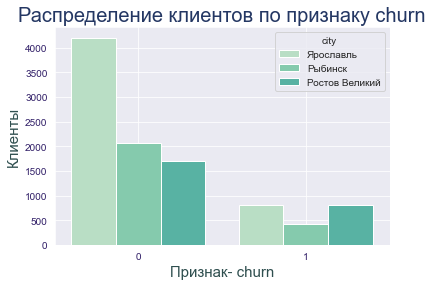

In [37]:
#вызовем предыдущие функции с параметром hue='city'
tab(data, hue='city')  

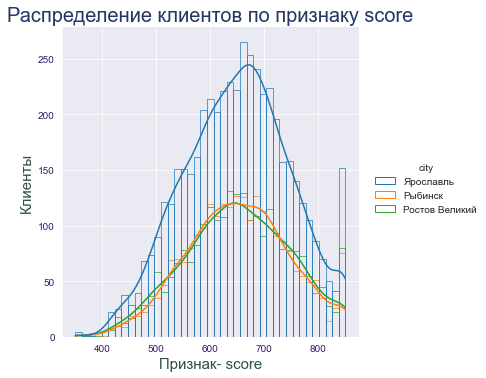

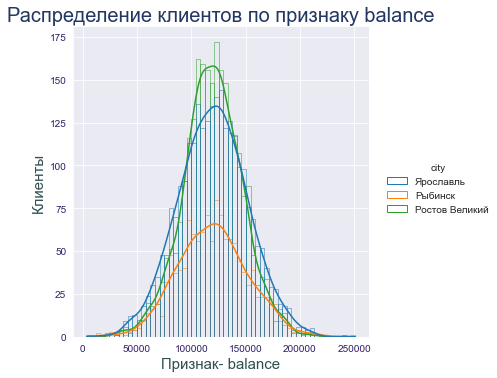

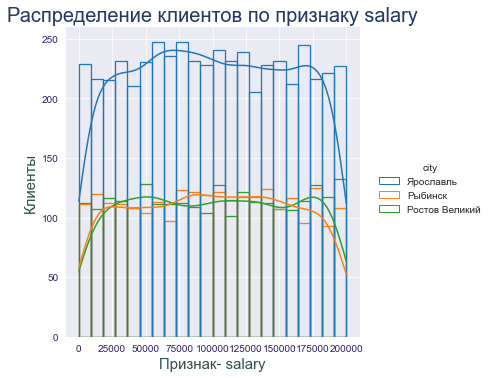

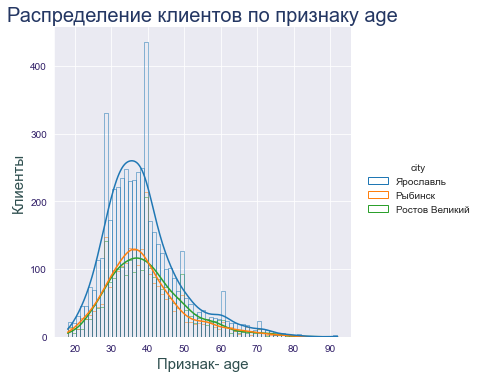

In [38]:
kde(data, hue='city');

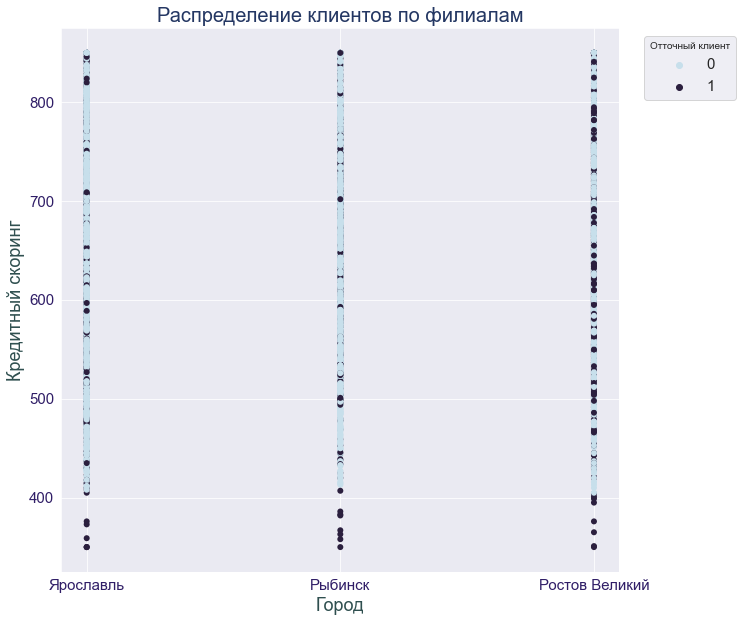

In [39]:
#график scatterplot для наглядности распределения
ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x='city', y="score", hue='churn',
                palette="ch:s=.25,rot=-.25", linewidth=0,
                data=data)
plt.title('Распределение клиентов по филиалам', fontsize=20, color='#243763')
plt.legend(title='Отточный клиент',fontsize='15',bbox_to_anchor= (1.03, 1))
plt.xlabel('Город', fontsize='18', color='#2F4F4F')
plt.ylabel('Кредитный скоринг', fontsize='18', color='#2F4F4F')
plt.xticks(fontsize='15', color='#301E67')
plt.yticks(fontsize='15', color='#301E67')
plt.grid(True)
plt.show();

**Вывод**
<p></p>
<div style="border:solid green 2px; padding: 20px">
<p></p> По графикам видно: ушедших клиентов больше всего в Ростове, при том что в Ярославле клиентов больше в два раза. Выделяется график с остаточным балансом - в Ростове Великом остатки на счетах выше, чем в Ярославле или Рыбинске.<br />
   Последний график иллюстрирует еще одну особенность - клиенты с рейтингом меньше 400 отточные. Ну и в целом опять же в Ростове больше всего отточных клиентов.<br />

### Распределение признаков в разрезе количества используемых продуктов.

In [40]:
#посмотрим количество клиентов в разрезе признака
products_group = data.groupby('products')['user_id'].count().sort_values(ascending=False).reset_index()
products_group

,products,user_id
0,1,5084
1,2,4590
2,3,266
3,4,60


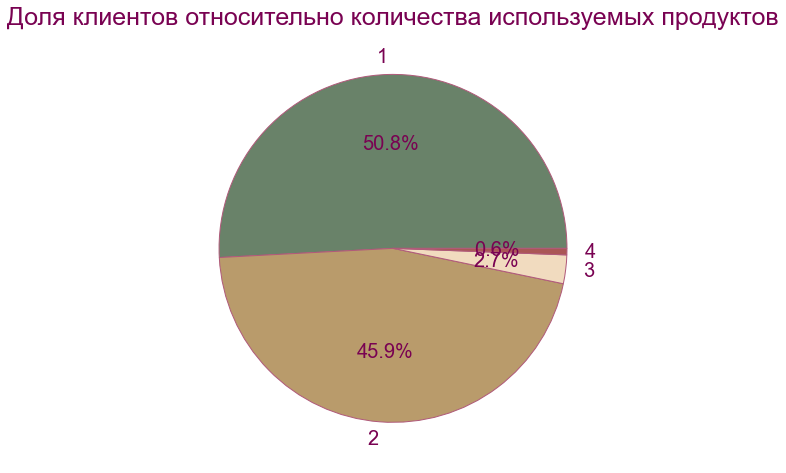

In [41]:
#график
fig, ax = plt.subplots(figsize=(13, 8))
ax.pie(products_group['user_id'], labels=products_group['products'], textprops={'fontsize':20, 'color':'#790252'}, 
       colors=['#698269','#B99B6B','#F1DBBF','#AA5656'],
       autopct='%1.1f%%', wedgeprops = { 'linewidth' : 1, 'edgecolor' : '#B05A7A' })

plt.title('Доля клиентов относительно количества используемых продуктов', fontsize='25', color='#790252')

plt.show();

*Больше всего клиентов с 1 продуктом, на 5% меньше с 2мя продуктами. Доля с 3 мя продуктами 2,7%, а с 4мя совсем незначительное количество.*

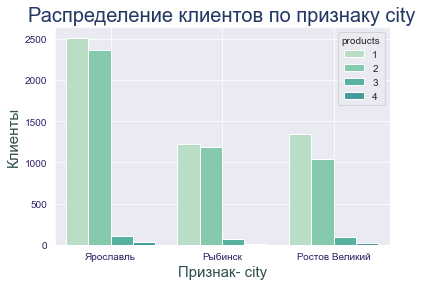

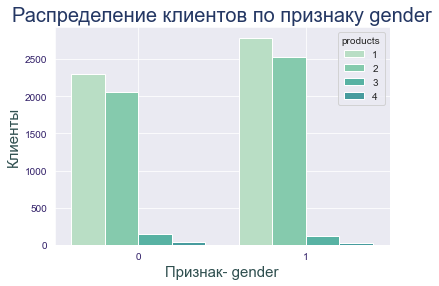

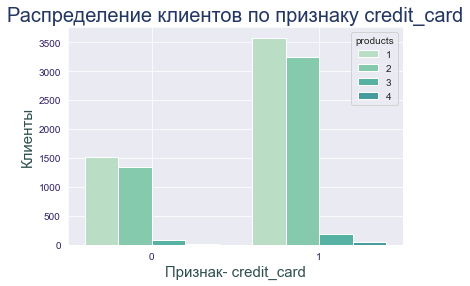

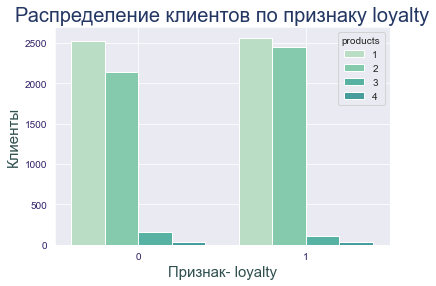

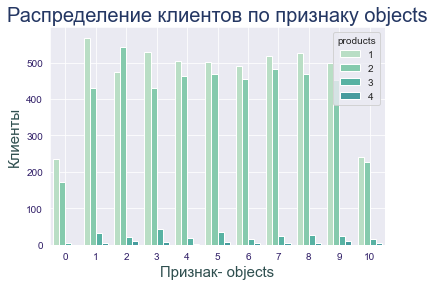

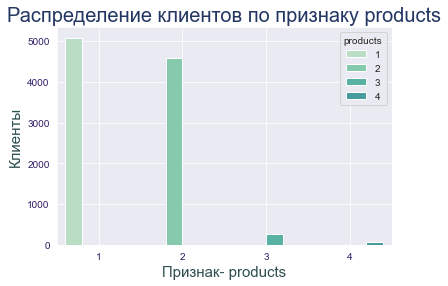

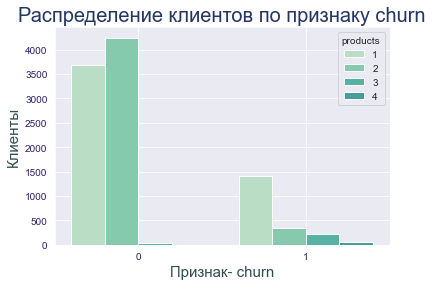

In [42]:
tab(data, hue='products') 

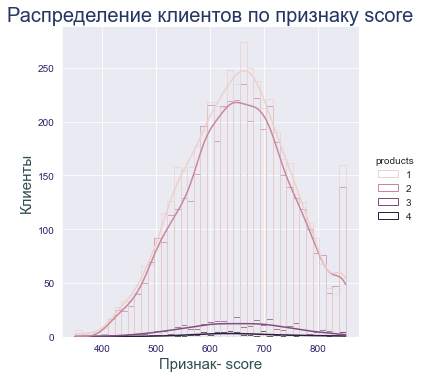

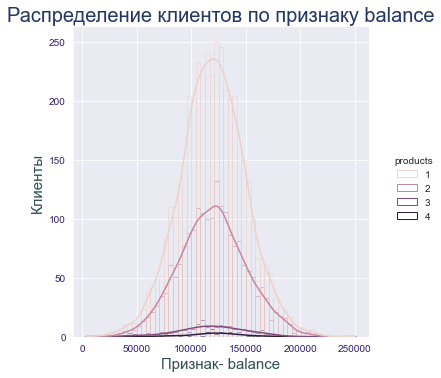

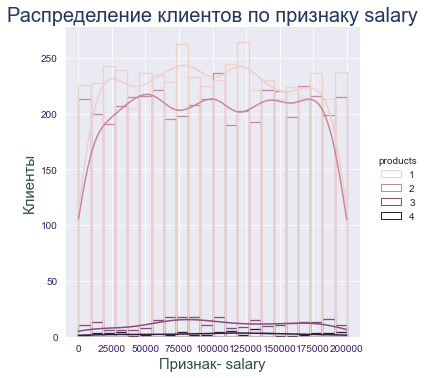

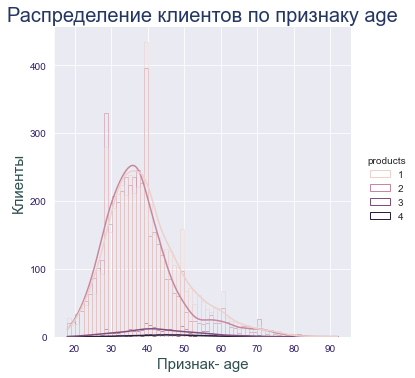

In [43]:
kde(data, hue='products');

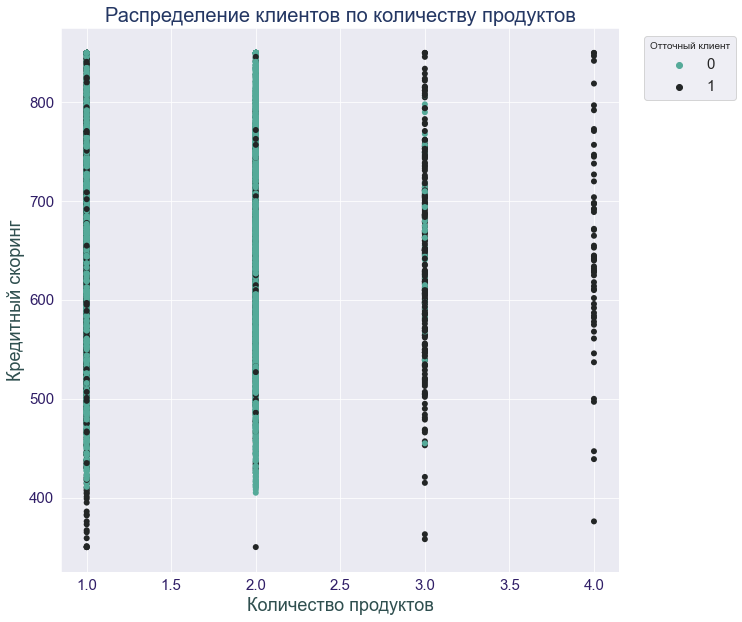

In [44]:
ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x='products', y="score", hue='churn',
                palette="dark:#5A9_r",linewidth=0, 
                data=data)
plt.title('Распределение клиентов по количеству продуктов', fontsize=20, color='#243763')
plt.legend(title='Отточный клиент',fontsize='15',bbox_to_anchor= (1.03, 1))
plt.xlabel('Количество продуктов', fontsize='18', color='#2F4F4F')
plt.ylabel('Кредитный скоринг', fontsize='18', color='#2F4F4F')
plt.xticks(fontsize='15', color='#301E67')
plt.yticks(fontsize='15', color='#301E67')
plt.grid(True)
plt.show();

**Вывод**
<p></p>
<div style="border:solid green 2px; padding: 20px">
<p></p> Мы выяснили, что более надежные клиенты с 2мя проудками, а отточные с 3-4мя. В Ростове, судя по графику, разрыв между 1 и 2 стобцом больше в пользу первого столбика. А в Ростове в целом больше отточных клиентов. Это еще раз подверждает, что с двумя продуктами клиент вероятнее всего останется. А все потому, что график "loyalty" показывает нам, что клиенты с 2мя продуктами более активные. По последнему графику можно сделать вывод, что клиенты с 4мя продуктами уходят в полный отток, с 3мя практически все также уходят в отток. Большое количество с 1м продуктом уходят, а с 2мя остаются. Еще 100% отток клиентов с рейтингом меньше 400.

## Проверка гипотез.

### Доходы клиентов, которые ушли и клиентов, которые остались, различаются.

**Нулевая гипотеза: доходы клиентов, которые ушли и клиентов, которые остались, различаются. <p></p> Альтернативная гипотеза: доходы клиентов, которые ушли и клиентов, которые остались, одинаковы.**

In [45]:
#использую библиотеку stats
sal_churn1 = data.loc[data['churn'] == 1]['salary']
sal_churn0 = data.loc[data['churn'] == 0]['salary']
alpha = 0.05
results = st.ttest_ind(sal_churn1, sal_churn0, equal_var = False)
display('p-значение:', results.pvalue)
if (results.pvalue > alpha):
    display('Отвергаем нулевую гипотезу')
else:
    display("Не получилось отвергнуть нулевую гипотезу")

'p-значение:'

0.228924613051458

'Отвергаем нулевую гипотезу'

*Как и выяснилось выше, доходы не играют роли в решение об уходе из банка.*

### Количество продуктов ушедших клиентов в среднем меньше количества продуктов у оставшихся.

**Нулевая гипотеза: количество продуктов ушедших клиентов в среднем меньше количества продуктов у оставшихся. <p></p> Альтернативная гипотеза: количество продуктов ушедших клиентов в среднем больше количества продуктов у оставшихся.**

In [46]:
pro_churn1 = data.loc[data['products'] <= 2]['churn']
pro_churn0 = data.loc[data['products'] >= 3]['churn']
alpha = 0.05
results = st.ttest_ind(pro_churn1, pro_churn0, equal_var = False)
display('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    display("Отвергаем нулевую гипотезу")
else:
    display("Не получилось отвергнуть нулевую гипотезу")

'p-значение:'

1.4214004685725626e-114

'Отвергаем нулевую гипотезу'

*Чем больше проудктов, тем вероятнее отток.*

## Выводы.

<div style="background: #E6E6FA; padding: 5px; border: 1px solid #778899; border-radius: 5px;">
    <font color='20B2AA'><b>Выгрузка, изучение и предобработка данных:</b></font>
    <br />
    <br />
    <font color='778899'> 1)Датафрейм имеет 12 столбцов и 10000 строк, пропуски есть только в 6 столбце. Типы данных в стобцах соответсвуют данным в них. <br />
        2)Объема данных достаточно для корректного анализа.<br />
        3)Названия приведены к единому стилю. <br />
        4)Дубликаты не найдены. <br />
        5)Значения пола клиентов заменены на 0/1, где "М"-1, "Ж"-0. <br />
        6)Не было возможности понять природу пропусков. Было принято решение оставить их как есть.<br /><br />
        <font color='20B2AA'><b>Исследовательский анализ данных:</b></font><br /><br />
        1) Общее распределение признаков клиентов банка:<br />
        Осталось загадкой равномерное распределение по зарплатам и объектов в собственности клиентов. Можно сделать предположение, что у банка нет достоверной информации о доходах клиентов, и они автоматически равномерно заполняются. <br />
        Выяснилось, что есть группа клиентов с максимальным рейтингом в 850, что странно. Возможно, это vip-клиенты или сами сотрудники банка. На анализ этот выброс не повилиял. <br />
        Также важно: мужчин чуть больше. чем женщин, средний возраст клиентов - 38 лет, 70% имеют кредитки, ушедших клиентов 20% и в Ярославле в 2 раза больше клиентов, чем в Ростове или Рыбинске.<br /><br />
        2) Анализ корреляций: выявлена очень слабая корреляция между всеми признаками.<br /><br />
        3) Составление портрета отточных и остающихся клиентов:<br /><br />
        <b>Портрет отточного клиента:</b><br /><br />
Наш ушедший клиент, возможно, из Ростова Великого, это женщина в возрасте около 45 лет. У нее может быть или не быть кредитной карты, а также ,скорее всего, она является неактивным клиентом с 3-4 продуктами.<br /><br />
        <b>Портрет клиента, оставшегося с банком:</b><br /><br />
Это мужчина моложе оттчного клиента (около 32-39 лет), с Ярославля, активный для банка и скорее всего с двумя продуктами.
У обоих типов клиентов кредитный рейтинг, остаток на балансе и заработная плата примерно на одном уровне.<br /><br />
        4) Распределение признаков в разрезе городов клиентов:<br />
        Ушедших клиентов больше всего в Ростове, при том что в Ярославле клиентов больше в два раза. В Ростове Великом остатки на счетах выше, чем в Ярославле или Рыбинске. Клиенты с рейтингом меньше 400 - отточные.<br /><br />
        5) Распределение признаков в разрезе количества используемых продуктов:<br />
       Более надежные клиенты с 2мя проудками, а отточные с 3-4мя. А все потому, что график "loyalty" показывает нам, что клиенты с 2мя продуктами более активные. Клиенты с 4мя продуктами уходят в полный отток, с 3мя практически все также уходят в отток. Большое количество с 1м продуктом уходят, а с 2мя остаются. Еще 100% отток клиентов с рейтингом меньше 400.<br /><br />
       <font color='20B2AA'><b>Проверка гипотез:</b></font><br />
        1) Гипотеза "Доходы клиентов, которые ушли и клиентов, которые остались, различаются." отвергнута.<br />
        2) Гипотеза "Количество продуктов ушедших клиентов в среднем меньше количества продуктов у оставшихся." отвергнута.<br />
        </font><p></p>
</div>

## Рекомендации.

<div style="background: #E6E6FA; padding: 5px; border: 1px solid #778899; border-radius: 5px;">
    <font color='20B2AA'><b>Учесть портрет отточного клиента.</b></font>
    <br />
        <font color='778899'> Нужно обратить внимание на женщин около 45 лет. Провести опрос среди них, получить больше сведений о причинах ухода. Часто, женщины в этом возрасте финансово состоялись и терять таких клиентов нельзя.<br />
     <font color='20B2AA'><b>Установить причину оттока в Ростове Великом.</b></font> <br />
      Такая причина должна быть, потому что отток необычайно большой. Нужно провести проверку в филиале. Возможно, клиентов не устраивает обслуживание, большие очереди или неудобное расположение филиала.<br />
      <font color='20B2AA'><b>Обратить на качество, а не на количество продуктов.</b></font><br />
       Возможно, банк не справляется с обслуживанием нескольких продуктов у одного клиента. Нужно выяснить причину оттока, или сосредоточить вниманние клиента на уже открытых продуктах с помощью бонусов или рекламы.<br />
      <font color='20B2AA'><b>Поработать с клиентами, кредитный рейтинг которых меньше 400.</b></font><br />
       Может быть стоит рассмотреть возможность отказывать в сотрудничестве клиентам с очень низким рейтингом.<br />
    </font><p></p>
</div>

## Презентация.

<https://disk.yandex.kz/d/pYapDxSctig5IA>

## Дашборд.